In [1]:
import sys
import os
# Get the absolute path to the project root
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
# Add it to sys.path
sys.path.append(project_root)

In [2]:
from bimpcc.dataset import get_blur_dataset
from bimpcc.models.tvreconstruction_model import TVReconstructionMPCC
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr
import scipy.sparse as sp
import numpy as np


In [3]:
def plot_experiment(true,noisy,u, alpha):
    
    fig,ax = plt.subplots(1,3,figsize=(14,4))
    ax[0].imshow(true,cmap='gray')
    ax[0].set_title('True Image')
    ax[0].axis('off')
    ax[1].imshow(noisy,cmap='gray')
    ax[1].set_title('Noisy Image\nPSNR: {:.4f}'.format(psnr(true,noisy)))
    ax[1].axis('off')
    ax[2].imshow(u,cmap='gray')
    ax[2].set_title(f'Reconstructed Image\nPSNR: {psnr(true,u):.4f}\n alpha = {alpha}')
    # ax[2].set_xlabel('alpha = {}'.format(alpha))
    ax[2].axis('off')

    plt.show()

In [4]:
scale = 20

In [5]:
dataset = get_blur_dataset("cameraman",scale=scale)
true, blurred = dataset.get_training_data()

(np.float64(-0.5), np.float64(19.5), np.float64(19.5), np.float64(-0.5))

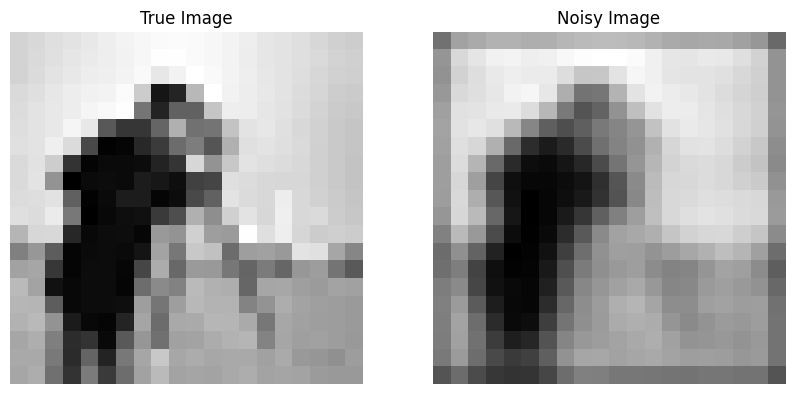

In [6]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(true,cmap='gray')
ax[0].set_title('True Image')
ax[0].axis('off')
ax[1].imshow(blurred,cmap='gray')
ax[1].set_title('Noisy Image')
ax[1].axis('off')

In [ ]:
from bimpcc.utils import gaussian_blur_sparse_matrix
forward_map = gaussian_blur_sparse_matrix(true.shape)
model = TVReconstructionMPCC(forward_map,true,blurred,epsilon=1e-3,t_init=1.0)

In [8]:
res,x_opt,fun_opt = model.solve(max_iter=20,t_min=1e-9,tol=1e-2,print_level=0,verbose=True, nlp_max_iter=5000, nlp_tol=1e-6)

Iter   Termination_status            Objective      MPCC_compl               t


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************



0                 0  1.7600172889366001      2.911948699126937                  1.0

1                 0  1.7539022058788931      2.894397149119841                  0.5

2                 0  1.7252396340073763      2.8326407302345333                0.25

3                 0  1.7537987702033138      2.2907504170372874               0.125

4                 0  1.8524478441113787      1.7455391414104784              0.0625

5                 0  2.057452631814292       1.2440910646252383             0.03125

6                 0  2.309176897926901       0.8475871866271538            0.015625

7                 0  2.5492590405711573      0.5748309125652257           0.0078125

8                 0  2.738081693289016       0.381146544667805           0.00390625

9                 0  2.874846839274692       0.25968391902517757        0.001953125

10                 0  2.965231006892463       0.19218169097817173       0.0009765625

11                 0  3.0237413718310178      0.13295955394362405      0.00048828125

12                 0  3.0595927207839755      0.09102196215351462     0.000244140625

13                 0  3.0815706373940985      0.060525475397563394    0.0001220703125

14                 0  3.094613860627864       0.03964910561365051     6.103515625e-05

15                 0  3.1022531648280567      0.024692725714898254    3.0517578125e-05

16                 0  3.1066886353589087      0.015201271444287172    1.52587890625e-05

17*                0  3.1092610894062833      0.009269147734627557    7.62939453125e-06

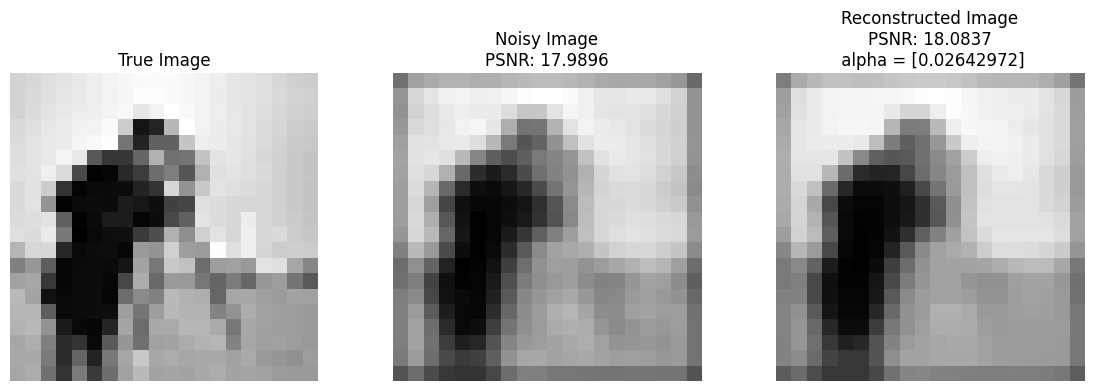

In [9]:
u, q, r, delta, theta, alpha = model.parse_vars_fn(x_opt)
u = u.reshape((scale,scale))
plot_experiment(true,blurred,u,alpha)